# Exercise

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.

This file has car sell prices for 3 different models. 

First plot data points on a scatter plot chart to see if linear regression model can be applied. 

If yes, then build a model that can answer following questions
    


 **1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**
    
**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**,
    
**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
path=os.getcwd()

In [3]:
data=pd.read_csv(path+'\\carprices.csv')

In [4]:
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


Text(0, 0.5, 'Sell Price($)')

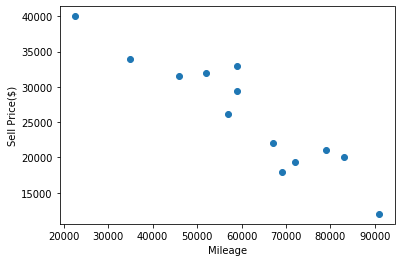

In [5]:
%matplotlib inline
plt.scatter(data.Mileage,data['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')

# ① get_dummies

In [6]:
dummies=pd.get_dummies(data['Car Model'])

In [7]:
data_dummies=pd.concat([data,dummies],axis='columns')

In [8]:
data_dummies

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [9]:
data_dummies.drop(['Car Model','Mercedez Benz C class'],axis='columns',inplace=True)

In [10]:
data_dummies

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [11]:
X_dummies=data_dummies.drop(['Sell Price($)'],axis='columns')

In [12]:
y_dummies=data_dummies['Sell Price($)']

In [13]:
linreg_dummies=LinearRegression()

In [14]:
linreg_dummies.fit(X_dummies,y_dummies)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
#2) Predict price of a BMW X5 that is 7 yr old with mileage 86000,
#3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())
car1=[[45000,4,0,0]]
car2=[[86000,7,0,1]]

In [16]:
#car1 price
linreg_dummies.predict(car1)

array([36991.31721061])

In [17]:
#car2 price
linreg_dummies.predict(car2)

array([11080.74313219])

In [18]:
#model accuracy score
linreg_dummies.score(X_dummies,y_dummies)

0.9417050937281083

# ② OneHotEncoder with Pipeline

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [20]:
column_trans=make_column_transformer((OneHotEncoder(),['Car Model']),remainder='passthrough')

In [21]:
X_ohe=data.drop(['Sell Price($)'],axis='columns')

In [22]:
y_ohe=data['Sell Price($)']

In [23]:
column_trans.fit_transform(X_ohe)

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [24]:
linreg_ohe=LinearRegression()

In [25]:
pipe=make_pipeline(column_trans,linreg_ohe)

In [26]:
pipe.fit(X_ohe,y_ohe)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Car Model'])],
                                   verbose=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                           

In [27]:
#cars parameters(columns the same as original data set)
cars_ohe=pd.DataFrame([['Mercedez Benz C class',45000,4,],['BMW X5',86000,7,]],columns=['Car Model', 'Mileage', 'Age(yrs)'])

In [28]:
#cars predicted price using OneHotEncoder
pipe.predict(cars_ohe)

array([36991.31721061, 11080.7431322 ])

In [29]:
#accuracy score using OneHotEncoder
pipe.score(X_ohe,y_ohe)

0.9417050937281083